In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
import keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,layers,Input

In [4]:
df = pd.read_csv('Movie genere classification.csv')

In [5]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(418)

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['sentiment'].unique()

array([0, 1])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49551 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49551 non-null  object
 1   sentiment  49551 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [13]:
for i in range(10):
    print(df['review'][i])

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

In [14]:
x = df['review']
y = df['sentiment']

In [15]:
tokenizer = Tokenizer(num_words=5000)

In [16]:
tokenizer.fit_on_texts(x)

In [17]:
x = tokenizer.texts_to_sequences(x)

In [18]:
x = pad_sequences(x, maxlen=400,padding='post')

In [19]:
vocab_size = tokenizer.num_words + 1

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2)

In [21]:
x


array([[  11,   17,    6, ...,    0,    0,    0],
       [ 157, 3618,  158, ...,    0,    0,    0],
       [   1, 1257,    3, ...,    0,    0,    0],
       ...,
       [  31,    1,   55, ...,    0,    0,    0],
       [  69,   43,   22, ...,    0,    0,    0],
       [ 117,   11,   17, ...,    0,    0,    0]], dtype=int32)

In [22]:
xtrain

array([[  32,   87,   19, ...,    0,    0,    0],
       [  11, 1380,   61, ...,    0,    0,    0],
       [  11,    6,    1, ...,    0,    0,    0],
       ...,
       [  10,  209,   11, ...,    0,    0,    0],
       [  31,    1,  892, ...,    0,    0,    0],
       [   4,   85,    2, ...,   41,  147,   11]], dtype=int32)

In [23]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 128,input_shape=(xtrain.shape[1],)))
model.add(layers.GRU(62))
model.add(layers.Dense(128,activation='elu'))
model.add(layers.Dense(64,activation='elu'))
model.add(layers.Dense(32,activation='elu'))

model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.fit(xtrain,ytrain,epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 75s 74ms/step - accuracy: 0.5026 - loss: 0.6937 - val_accuracy: 0.5144 - val_loss: 0.6884
Epoch 2/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.5240 - loss: 0.6813 - val_accuracy: 0.5235 - val_loss: 0.6816
Epoch 3/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 74s 75ms/step - accuracy: 0.6939 - loss: 0.5250 - val_accuracy: 0.8949 - val_loss: 0.2634
Epoch 4/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 74s 74ms/step - accuracy: 0.9262 - loss: 0.1994 - val_accuracy: 0.9012 - val_loss: 0.2470
Epoch 5/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 74s 75ms/step - accuracy: 0.9554 - loss: 0.1306 - val_accuracy: 0.8976 - val_loss: 0.2933
Epoch 6/10
640/991 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9762 - loss: 0.0760

KeyboardInterrupt: 

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 400, 128)       │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 62)             │        35,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,082,821 (7.95 MB)

 Trainable params: 694,273 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,388,548 (5.30 MB)

In [28]:
model.evaluate(xtrain,ytrain)

1239/1239 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.9813 - loss: 0.0627


[0.11602896451950073, 0.9650605320930481]

In [29]:
xtest

array([[  39,  289,   11, ...,    0,    0,    0],
       [  11,  248, 4489, ...,    0,    0,    0],
       [  21,   57, 1928, ...,    0,    0,    0],
       ...,
       [  15,   83,   37, ...,    0,    0,    0],
       [  82,    1, 1143, ...,   22, 2723,  142],
       [   6,   54, 1472, ..., 1188,    5,  362]], dtype=int32)

In [40]:
pred = model.predict(xtest)

310/310 ━━━━━━━━━━━━━━━━━━━━ 34s 111ms/step


In [43]:
pred = [1 if pred>.5 else 0 for pred in pred]

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
ytest.shape

(9911,)

In [46]:
pred

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,


In [44]:
accuracy_score(ytest,pred)

0.8915346584602967

<Axes: >

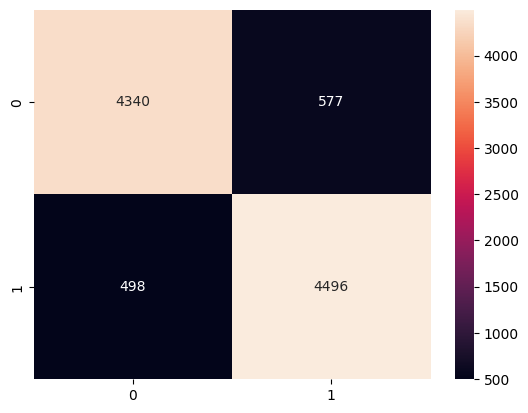

In [47]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [48]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4917
           1       0.89      0.90      0.89      4994

    accuracy                           0.89      9911
   macro avg       0.89      0.89      0.89      9911
weighted avg       0.89      0.89      0.89      9911

